In [3]:
pip install matplotlib google-cloud-storage

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: C:\Vinh\Python\Machine Learning\LLM\cuda\Scripts\python.exe -m pip install --upgrade pip


In [1]:
import torch
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [2]:
import collections
import copy
import hashlib
import io
import os
import subprocess
import textwrap
import time

from typing import List, Text

from PIL import Image

import numpy as np
import pandas as pd
import tabulate


import tensorflow as tf

import matplotlib.pyplot as plt

In [3]:
import pandas as pd

cases_df = pd.read_csv('./scin_cases.csv', dtype={'case_id': str})
labels_df = pd.read_csv('./scin_labels.csv', dtype={'case_id': str})

df = pd.merge(cases_df, labels_df, on='case_id')

In [7]:
labels_df.head()

,case_id,dermatologist_gradable_for_skin_condition_1,dermatologist_gradable_for_skin_condition_2,dermatologist_gradable_for_skin_condition_3,dermatologist_skin_condition_on_label_name,dermatologist_skin_condition_confidence,weighted_skin_condition_label,dermatologist_gradable_for_fitzpatrick_skin_type_1,dermatologist_gradable_for_fitzpatrick_skin_type_2,dermatologist_gradable_for_fitzpatrick_skin_type_3,dermatologist_fitzpatrick_skin_type_label_1,dermatologist_fitzpatrick_skin_type_label_2,dermatologist_fitzpatrick_skin_type_label_3,gradable_for_monk_skin_tone_india,gradable_for_monk_skin_tone_us,monk_skin_tone_label_india,monk_skin_tone_label_us
0,-1000600354148496558,DEFAULT_YES_IMAGE_QUALITY_SUFFICIENT,NaN,NaN,"['Inflicted skin lesions', 'Eczema', 'Irritant...","[4, 4, 3]","{'Inflicted skin lesions': 0.41, 'Eczema': 0.4...",YES,NaN,NaN,FST2,NaN,NaN,True,True,2.0,1.0
1,-1002039107727665188,DEFAULT_YES_IMAGE_QUALITY_SUFFICIENT,NaN,NaN,"['Prurigo nodularis', 'Actinic Keratosis', 'SC...","[4, 3, 4]","{'Prurigo nodularis': 0.41, 'SCC/SCCIS': 0.41,...",YES,NaN,NaN,FST1,NaN,NaN,True,True,3.0,3.0
2,-1003358831658393077,DEFAULT_YES_IMAGE_QUALITY_SUFFICIENT,NaN,NaN,"['Impetigo', 'Herpes Zoster', 'Bullous dermati...","[2, 1, 1]","{'Impetigo': 0.55, 'Herpes Zoster': 0.23, 'Bul...",YES,NaN,NaN,FST4,NaN,NaN,True,True,3.0,4.0
3,-1003826561155964328,NO_IMAGE_QUALITY_INSUFFICIENT,NaN,NaN,[],[],{},NO,NaN,NaN,NaN,NaN,NaN,True,True,2.0,4.0
4,-1003844406100696311,DEFAULT_YES_IMAGE_QUALITY_SUFFICIENT,NaN,NaN,"['Lichen planus/lichenoid eruption', 'Follicul...","[1, 1, 1]","{'Lichen planus/lichenoid eruption': 0.33, 'Fo...",YES,NaN,NaN,FST1,NaN,NaN,True,True,1.0,1.0


In [8]:
df.head()

,case_id,source,release,year,age_group,sex_at_birth,fitzpatrick_skin_type,race_ethnicity_american_indian_or_alaska_native,race_ethnicity_asian,race_ethnicity_black_or_african_american,...,dermatologist_gradable_for_fitzpatrick_skin_type_1,dermatologist_gradable_for_fitzpatrick_skin_type_2,dermatologist_gradable_for_fitzpatrick_skin_type_3,dermatologist_fitzpatrick_skin_type_label_1,dermatologist_fitzpatrick_skin_type_label_2,dermatologist_fitzpatrick_skin_type_label_3,gradable_for_monk_skin_tone_india,gradable_for_monk_skin_tone_us,monk_skin_tone_label_india,monk_skin_tone_label_us
0,-1000600354148496558,SCIN,1.0.0,2023,AGE_UNKNOWN,OTHER_OR_UNSPECIFIED,NaN,NaN,NaN,NaN,...,YES,NaN,NaN,FST2,NaN,NaN,True,True,2.0,1.0
1,-1002039107727665188,SCIN,1.0.0,2023,AGE_UNKNOWN,OTHER_OR_UNSPECIFIED,NaN,NaN,NaN,NaN,...,YES,NaN,NaN,FST1,NaN,NaN,True,True,3.0,3.0
2,-1003358831658393077,SCIN,1.0.0,2023,AGE_18_TO_29,MALE,NONE_IDENTIFIED,NaN,NaN,NaN,...,YES,NaN,NaN,FST4,NaN,NaN,True,True,3.0,4.0
3,-1003826561155964328,SCIN,1.0.0,2023,AGE_UNKNOWN,OTHER_OR_UNSPECIFIED,NaN,NaN,NaN,NaN,...,NO,NaN,NaN,NaN,NaN,NaN,True,True,2.0,4.0
4,-1003844406100696311,SCIN,1.0.0,2023,AGE_40_TO_49,FEMALE,FST3,NaN,NaN,NaN,...,YES,NaN,NaN,FST1,NaN,NaN,True,True,1.0,1.0


In [4]:
from collections import Counter
import re

def clean_condition_string(condition_str):
    # Clean dataset
    return re.sub(r"[\'\[\]\s]+", "", condition_str)

def get_top_conditions(df, top_n_conditions=15):
    condition_ctr = Counter()
    for entry in df["dermatologist_skin_condition_on_label_name"].dropna():
        if isinstance(entry, str):
            # Clean the entry
            cleaned_entry = clean_condition_string(entry)
            if cleaned_entry:
                # Split if there are multiple conditions separated by commas
                conditions = [condition.strip() for condition in cleaned_entry.split(',')]
                condition_ctr.update(conditions)
        else:
            print(f"Unexpected entry format: {entry} (type: {type(entry)})")
    top_conditions = [condition for condition, _ in condition_ctr.most_common(top_n_conditions)]
    return top_conditions

top_conditions = get_top_conditions(df, top_n_conditions=15)
print(f'Top 15 Conditions: {top_conditions}')


Top 50 Conditions: ['Eczema', 'AllergicContactDermatitis', 'InsectBite', 'Urticaria', 'Psoriasis', 'Folliculitis', 'IrritantContactDermatitis', 'Tinea', 'NOS', 'HerpesZoster', 'DrugRash', 'HerpesSimplex', 'Acutedermatitis', 'Impetigo', 'Hypersensitivity']


In [7]:
import ast

#Transform list in skin condition label into real list
df["dermatologist_skin_condition_on_label_name"] = df["dermatologist_skin_condition_on_label_name"].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)
all_conditions = [condition for sublist in df["dermatologist_skin_condition_on_label_name"] for condition in sublist]

# Create a set of unique conditions
unique_conditions = set(all_conditions)
unique_conditions = sorted(unique_conditions)

print(len(unique_conditions), unique_conditions)

370 ['AKV - Acrokeratosis verruciformis', 'Abrasion and/or friction burn of lower limb without infection', 'Abrasion and/or friction burn of thigh without infection', 'Abrasion of wrist', 'Abrasion, scrape, or scab', 'Abscess', 'Acanthosis nigricans', 'Acne', 'Acne keloidalis', 'Acne urticata', 'Acneiform eruption', 'Acquired digital fibrokeratoma', 'Acquired poikiloderma', 'Acral erythema', 'Acral persistent papular mucinosis', 'Actinic Keratosis', 'Actinic granuloma', 'Acute and chronic dermatitis', 'Acute constitutional eczema', 'Acute dermatitis', 'Acute dermatitis, NOS', 'Acute generalised exanthematous pustulosis', 'Acute ulcer of skin', 'Acute vesicular dermatitis', 'Acute-on-chronic dyshidrotic eczema of hands', 'Adnexal neoplasm', 'Agminate folliculitis', 'Allergic Contact Dermatitis', 'Allergic contact dermatitis caused by allergenic hapten derived from plant', 'Amyloidosis of skin', 'Anetoderma', 'Angiokeratoma of skin', 'Angiosarcoma of skin', 'Animal bite - wound', 'Annula

In [11]:
def filter_top_conditions(df, top_conditions):
    def filter_conditions(conditions_list):
        if isinstance(conditions_list, list):
            return [cond for cond in conditions_list if cond in top_conditions]
        return []

    df_filtered = df.copy()
    df_filtered["dermatologist_skin_condition_on_label_name"] = df_filtered["dermatologist_skin_condition_on_label_name"].apply(filter_conditions)
    return df_filtered

filtered_df = filter_top_conditions(df, top_conditions)
filtered_df = filtered_df[filtered_df['dermatologist_skin_condition_on_label_name'].apply(lambda x: len(x) > 0)]
filtered_df["dermatologist_skin_condition_on_label_name"]

0                                         [Eczema]
2                                       [Impetigo]
4                                   [Folliculitis]
5                                         [Eczema]
6                           [Urticaria, Urticaria]
                           ...                    
5018                                   [Psoriasis]
5021    [Eczema, Hypersensitivity, Eczema, Eczema]
5025                                   [Urticaria]
5030                                    [Impetigo]
5032                                [Folliculitis]
Name: dermatologist_skin_condition_on_label_name, Length: 1820, dtype: object

In [12]:
condition_to_index = {condition: idx for idx, condition in enumerate(top_conditions)}

In [14]:
def conditions_to_binary_matrix(conditions_list, condition_to_index):
    binary_matrix = np.zeros(len(condition_to_index))
    for condition in conditions_list:
        if condition in condition_to_index:
            binary_matrix[condition_to_index[condition]] = 1
    return binary_matrix
binary_labels = np.array([conditions_to_binary_matrix(conds, condition_to_index)
                          for conds in filtered_df["dermatologist_skin_condition_on_label_name"]])
binary_labels
print(len(binary_labels))

1820


In [15]:
from pathlib import Path

local_image_dir = Path("C:/Vinh/Python/Machine Learning/Skin condition detection/images")

def update_image_paths(df):
    for col in ['image_1_path', 'image_2_path', 'image_3_path']:
        df[col] = df[col].apply(lambda x: str(local_image_dir / Path(x).name) if pd.notna(x) else x)
    return df

image_paths_df = update_image_paths(filtered_df)

In [16]:
from concurrent.futures import ThreadPoolExecutor, as_completed
from PIL import Image
import numpy as np

def load_and_preprocess_image(image_path, target_size=(224, 224)):
    try:
        image = Image.open(image_path).convert('RGB')
        image = image.resize(target_size)
        image = np.array(image) / 255.0
        return image
    except Exception as e:
        print(f"Error loading image {image_path}: {e}")
        return np.zeros(target_size + (3,))

def process_images(image_paths_df, target_size=(224, 224), max_workers=8):
    all_images = []
    
    def load_image(path):
        return load_and_preprocess_image(path, target_size)
    
    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        futures = [executor.submit(load_image, row['image_1_path']) for _, row in image_paths_df.iterrows()]
        for future in as_completed(futures):
            result = future.result()
            all_images.append(result)
            
    return np.array(all_images)

images = process_images(image_paths_df)

Error loading image C:\Vinh\Python\Machine Learning\Skin condition detection\images\-2243186711511406658.png: [Errno 2] No such file or directory: 'C:\\Vinh\\Python\\Machine Learning\\Skin condition detection\\images\\-2243186711511406658.png'


In [20]:
valid_image_2_paths_df = filtered_df[filtered_df['image_2_path'].notna()]

binary_labels_2 = np.array([conditions_to_binary_matrix(conds, condition_to_index)
                          for conds in valid_image_2_paths_df["dermatologist_skin_condition_on_label_name"]])

def process_images(image_paths, target_size=(224, 224), max_workers=8):
    def load_image(image_path):
        return load_and_preprocess_image(image_path, target_size)
    
    all_images = []
    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        futures = [executor.submit(load_image, path) for path in image_paths]
        for future in as_completed(futures):
            result = future.result()
            all_images.append(result)
    return np.array(all_images)

image_2_paths = valid_image_2_paths_df['image_2_path'].tolist()
image_2_processed = process_images(image_2_paths)

In [21]:
valid_image_3_paths_df = filtered_df[filtered_df['image_3_path'].notna()]

binary_labels_3 = np.array([conditions_to_binary_matrix(conds, condition_to_index)
                          for conds in valid_image_3_paths_df["dermatologist_skin_condition_on_label_name"]])

def process_images(image_paths, target_size=(224, 224), max_workers=8):
    def load_image(image_path):
        return load_and_preprocess_image(image_path, target_size)
    
    all_images = []
    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        futures = [executor.submit(load_image, path) for path in image_paths]
        for future in as_completed(futures):
            result = future.result()
            all_images.append(result)
    return np.array(all_images)

image_3_paths = valid_image_3_paths_df['image_3_path'].tolist()
image_3_processed = process_images(image_3_paths)

combined_images = np.concatenate((images, image_2_processed, image_3_processed), axis=0)
combined_labels = np.concatenate((binary_labels, binary_labels_2, binary_labels_3), axis=0)

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(combined_images, combined_labels, test_size=0.2, random_state=42)

In [24]:
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)

print("Number of samples in X_train:", X_train.shape[0])
print("Number of samples in X_val:", X_val.shape[0])
print("Number of samples in y_train:", y_train.shape[0])
print("Number of samples in y_val:", y_val.shape[0])

X_train shape: (3163, 224, 224, 3)
X_val shape: (791, 224, 224, 3)
y_train shape: (3163, 15)
y_val shape: (791, 15)
Number of samples in X_train: 3163
Number of samples in X_val: 791
Number of samples in y_train: 3163
Number of samples in y_val: 791


In [25]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))

import tensorflow as tf

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


datagen.fit(X_train)

In [26]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, Dropout, Dense

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

base_model.trainable = False

model = Sequential([
    base_model,  
    GlobalAveragePooling2D(),  
    Dense(256, activation='relu'), 
    Dense(15, activation='sigmoid')  
])

In [98]:
model.summary()

ValueError: Undefined shapes are not supported.

In [27]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=10, validation_data=(X_val, y_val))

Epoch 1/10


C:\Vinh\Python\Machine Learning\LLM\cuda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


99/99 ━━━━━━━━━━━━━━━━━━━━ 188s 2s/step - accuracy: 0.5341 - loss: 0.2602 - val_accuracy: 0.6157 - val_loss: 0.1928
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.5845 - loss: 0.1962 - val_accuracy: 0.6157 - val_loss: 0.1898
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 183s 2s/step - accuracy: 0.5792 - loss: 0.1960 - val_accuracy: 0.6157 - val_loss: 0.1906
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 182s 2s/step - accuracy: 0.5913 - loss: 0.1929 - val_accuracy: 0.6144 - val_loss: 0.1930
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 183s 2s/step - accuracy: 0.6017 - loss: 0.1942 - val_accuracy: 0.6157 - val_loss: 0.1900
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 184s 2s/step - accuracy: 0.5825 - loss: 0.1950 - val_accuracy: 0.6157 - val_loss: 0.1902
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 185s 2s/step - accuracy: 0.5897 - loss: 0.1956 - val_accuracy: 0.6157 - val_loss: 0.1914
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 182s 2s/step - accuracy: 0.5895 - loss: 0.1942 - val_accuracy: 0.6157 - val_loss: 0.

In [75]:
filtered_df["image_2_path"].head(40)

0                                                   NaN
1                                                   NaN
2                                                   NaN
3     C:\Vinh\Python\Machine Learning\Skin condition...
4     C:\Vinh\Python\Machine Learning\Skin condition...
5     C:\Vinh\Python\Machine Learning\Skin condition...
6     C:\Vinh\Python\Machine Learning\Skin condition...
7                                                   NaN
8     C:\Vinh\Python\Machine Learning\Skin condition...
9                                                   NaN
10    C:\Vinh\Python\Machine Learning\Skin condition...
11    C:\Vinh\Python\Machine Learning\Skin condition...
12    C:\Vinh\Python\Machine Learning\Skin condition...
13                                                  NaN
14                                                  NaN
15    C:\Vinh\Python\Machine Learning\Skin condition...
16                                                  NaN
17    C:\Vinh\Python\Machine Learning\Skin condi

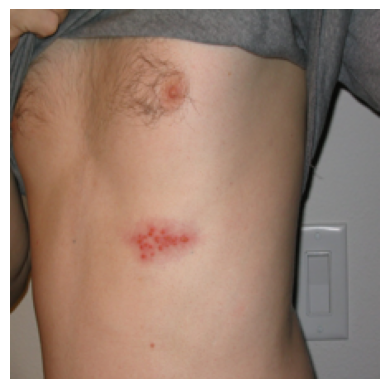

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
Top 3 Predictions:
Rank 1:
Class Name: Psoriasis
Probability: 0.8110
Rank 2:
Class Name: Impetigo
Probability: 0.7282
Rank 3:
Class Name: Urticaria
Probability: 0.3325


In [31]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import urllib

image_path = "https://cdn.lecturio.com/assets/Shingles-outbreak-on-the-chest-Herpes-zoster-1200x900.jpg"

try:
    with urllib.request.urlopen(image_path) as response:
        img = Image.open(response)
        
        img_resized = img.resize((224, 224))
        
        img_array = np.array(img_resized) 
        
        image = np.expand_dims(img_array, axis=0)

        plt.imshow(img_array)
        plt.axis('off') 
        plt.show()

        y_pred = model.predict(image)

        predictions = y_pred[0]  

        top_3_indices = np.argsort(predictions)[-3:][::-1]  
        top_3_probabilities = predictions[top_3_indices]  

        print("Top 3 Predictions:")
        for i, idx in enumerate(top_3_indices):
            print(f"Rank {i+1}:")
            print(f"Class Name: {top_conditions[idx]}")
            print(f"Probability: {top_3_probabilities[i]:.4f}")

except Exception as e:
    print(f"An error occurred: {e}")

['Urticaria']


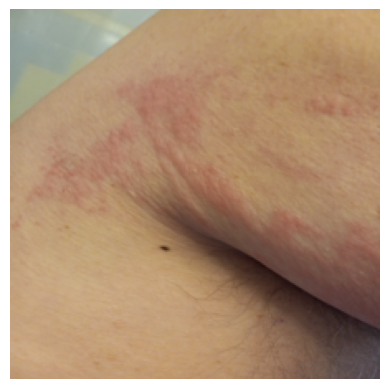

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
Top 3 Predictions:
Rank 1:
Class Name: Eczema
Probability: 0.2732
Rank 2:
Class Name: Psoriasis
Probability: 0.0695
Rank 3:
Class Name: Urticaria
Probability: 0.0676


In [106]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import urllib

image_path = filtered_df["image_2_path"][23]
label = filtered_df["dermatologist_skin_condition_on_label_name"][23]
print(label)

img = Image.open(image_path)
        
# Resize the image using PIL
img_resized = img.resize((224, 224))

# Convert resized image to NumPy array
img_array = np.array(img_resized) / 255.0  # Normalize to [0, 1]

# Expand dimensions to match model input shape
image = np.expand_dims(img_array, axis=0)

# Display the image
plt.imshow(img_array)
plt.axis('off') 
plt.show()

y_pred = model.predict(image)

predictions = y_pred[0]  # If y_pred is 2D, use y_pred[0] for a single image

# Get top 3 predictions
top_3_indices = np.argsort(predictions)[-3:][::-1]  # Get indices of the top 3 highest probabilities
top_3_probabilities = predictions[top_3_indices]  # Get the top 3 probabilities

# Print top 3 results
print("Top 3 Predictions:")
for i, idx in enumerate(top_3_indices):
    print(f"Rank {i+1}:")
    print(f"Class Name: {top_conditions[idx]}")
    print(f"Probability: {top_3_probabilities[i]:.4f}")